# Final Project Template

This workbook provides the template for the final project. 

## Instructions
- Work individually
- Please complete 1 copy of this template.
  - Complete all sections.
  - Feel free to include supporting material / slides / documents as needed.
- At the end of the project, you may be asked to present this workbook to the class (random selection).

### Submission Instructions
- Submit the .ipynb with the Output cells showing the results
  - Naming convention:
  ```
      <name1>-<name2>-<project_short_name>.ipynb
  ```
- If you provide your own datasets, include the data with your .ipynb, unless it is confidential

## Section 0: Housing Prices prediction exercise

## Section 1: Project Title

- The project aims to predict the final price of each home using their specific variables. 

## Section 2: Project Definition

### Goals

The goal of this project is to determine if house prices can be predicted using their features, and which features are most relevant .


### Dataset

The datatset can be found on Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
The training data shows 1460 house prices along with 80 housing features. I attempt to predict another 1459 house prices in the test data


### Tasks


1. Fill missing values and change feature type (numerical into string and vice versa) when necessary
2. Visualize variables with the highest correlations to the Sale Price
3. Find and eliminate outliers
4. Drop features where too much data is missing, or where variance is too small 
5. Perform One Hot Encoding for classification features
6. Shuffle and split data into train and test sets
7. Scale train/test independent features and visualize with PCA/Kbest
 

## Section 3: Data Engineering

Consider:
* Data Cleaning
* Data Exploration
* Imbalance / Data Sampling
* Data Encoding

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score, train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
import warnings
warnings.filterwarnings('ignore')

In [102]:
test=pd.read_csv("C://Users/matth/Downloads/house-prices-advanced-regression-techniques/test.csv")
train=pd.read_csv("C://Users/matth/Downloads/house-prices-advanced-regression-techniques/train.csv")
data=train.append(test, sort=False, ignore_index=True)

In [103]:
print(data.shape)
print(test.shape)
print(train.shape)

(2919, 81)
(1459, 80)
(1460, 81)


In [104]:
data.drop("Id",axis=1,inplace=True)

In [105]:
#Screen out numericalfeatures. This helps identify integer-type columns which should be objects
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data.select_dtypes(include=numerics)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,24,0,0,0,0,0,4,2006,NaN
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,474,0,0,0,0,0,0,9,2006,NaN
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,NaN


In [106]:
data.select_dtypes(exclude=numerics)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2916,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [107]:
#Based on the previous 2 cells, we see MSSubClass should really be an object rather than a number
data["MSSubClass"]=data["MSSubClass"].astype("object")

In [108]:
#Identify missing values and which features are the worst
list_of_nulls=(data.isnull().sum() / len(data)).sort_values(ascending=False)
list_of_nulls=list_of_nulls.drop(list_of_nulls[list_of_nulls==0].index)*100
initial_missing_data= pd.DataFrame({"% of Missing Data":list_of_nulls})
initial_missing_data[0:10]

,% of Missing Data
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071


In [109]:
#Drop the columns with more than 80% missing data
columns_to_drop=initial_missing_data[initial_missing_data["% of Missing Data"]>=80].index
data.drop(columns=columns_to_drop,axis=1,inplace=True)

In [110]:
#This gets an overall sense of the remaining missing data, as well as to identify possible errors

for x in data.select_dtypes(exclude=numerics).columns:
    print(f' {x} has ' + str(data[x].value_counts().sum()) + " different value counts" + " and " + str(data[x].isna().sum()) + " missing data")

 MSSubClass has 2919 different value counts and 0 missing data
 MSZoning has 2915 different value counts and 4 missing data
 Street has 2919 different value counts and 0 missing data
 LotShape has 2919 different value counts and 0 missing data
 LandContour has 2919 different value counts and 0 missing data
 Utilities has 2917 different value counts and 2 missing data
 LotConfig has 2919 different value counts and 0 missing data
 LandSlope has 2919 different value counts and 0 missing data
 Neighborhood has 2919 different value counts and 0 missing data
 Condition1 has 2919 different value counts and 0 missing data
 Condition2 has 2919 different value counts and 0 missing data
 BldgType has 2919 different value counts and 0 missing data
 HouseStyle has 2919 different value counts and 0 missing data
 RoofStyle has 2919 different value counts and 0 missing data
 RoofMatl has 2919 different value counts and 0 missing data
 Exterior1st has 2918 different value counts and 1 missing data
 Ext

In [111]:
for x in data.select_dtypes(include=numerics).columns:
    print(f' {x} has ' + str(data[x].value_counts().sum()) + " different value counts" + " and " + str(data[x].isna().sum()) + " missing data")

 LotFrontage has 2433 different value counts and 486 missing data
 LotArea has 2919 different value counts and 0 missing data
 OverallQual has 2919 different value counts and 0 missing data
 OverallCond has 2919 different value counts and 0 missing data
 YearBuilt has 2919 different value counts and 0 missing data
 YearRemodAdd has 2919 different value counts and 0 missing data
 MasVnrArea has 2896 different value counts and 23 missing data
 BsmtFinSF1 has 2918 different value counts and 1 missing data
 BsmtFinSF2 has 2918 different value counts and 1 missing data
 BsmtUnfSF has 2918 different value counts and 1 missing data
 TotalBsmtSF has 2918 different value counts and 1 missing data
 1stFlrSF has 2919 different value counts and 0 missing data
 2ndFlrSF has 2919 different value counts and 0 missing data
 LowQualFinSF has 2919 different value counts and 0 missing data
 GrLivArea has 2919 different value counts and 0 missing data
 BsmtFullBath has 2917 different value counts and 2 mi

In [112]:
#Let missing data equal to mode, given the mode is a large % of total input for these features
                        
data.MSZoning.fillna("RL",inplace=True)
data.Utilities.fillna("AllPub",inplace=True)
data.Exterior1st.fillna("VinylSd",inplace=True)
data.Exterior2nd.fillna("VinylSd",inplace=True)
data.Electrical.fillna("SBrkr",inplace=True)
data.KitchenQual.fillna("TA",inplace=True)
data.Functional.fillna("Typ",inplace=True)

#Assume missing data means Masonry veneer does not exist
data.MasVnrType.fillna("None",inplace=True)

#For basement-related data with Nan values, assume the basement/part of the basement is missing.
#Only ~80 houses have missing values, so this will be set at "Not available" for now
data.BsmtExposure.fillna("Not available",inplace=True) #or 'No'
data.BsmtCond.fillna("Not available",inplace=True) # or "TA"
data.BsmtFinType1.fillna("Not available",inplace=True) # or "Unf"
data.BsmtFinType2.fillna("Not available",inplace=True) # or "Unf"
data.BsmtQual.fillna("Not available",inplace=True) # or "TA"

#This is integer data, so "no basement" can be coded as 0
data.BsmtFinSF2.fillna(0,inplace=True)
data.BsmtFinSF1.fillna(0,inplace=True)


#FireplaceQu missing data means no fireplace.
#As almost half of the houses don't have fireplaces, so I may split the data into Fireplace/No Fireplace.  
data.FireplaceQu.fillna("None",inplace=True) # or "Gd"


#For Garage-related data with Nan values, assume the garage is missing.
#Only ~160 houses have missing values, so this will be set at "Not available" for now
data.GarageCond.fillna("Not available",inplace=True)  # or "TA"
data.GarageQual.fillna("Not available",inplace=True) # or "TA"
data.GarageFinish.fillna("Not available",inplace=True) # or "Unf"
data.GarageType.fillna("Not available",inplace=True) # or "Attchd"


data.GarageArea.fillna(0,inplace=True)
data.SaleType.fillna("WD",inplace=True)


#For continuous data, replace missing values with 0
# I don't use imputer because:
#a) Most features are  missing some data, so imputing incomplete data based on another incomplete data set does not make much sense
#b) These features already have 0 in their remaining values. Missing data could imply the feature is truly missing.
data.LotFrontage.fillna(0,inplace=True)

#all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
#   lambda x: x.fillna(x.median()))


data.MasVnrArea.fillna(0,inplace=True)
data.TotalBsmtSF.fillna(0,inplace=True)
data.BsmtHalfBath.fillna(0,inplace=True)
data.BsmtFullBath.fillna(0,inplace=True)
data.GarageCars.fillna(0,inplace=True)
data.TotalBsmtSF.fillna(0,inplace=True)
data.BsmtUnfSF.fillna(0,inplace=True)

#drop irrelevant data
data.drop("GarageYrBlt",axis=1,inplace=True)
data.drop("YearBuilt",axis=1,inplace=True)

In [113]:
#There are 2 houses with detached garage and incompete information. We see this from the missing data, where some GarageType has 157 missing sets and the others have 159 missing sets. 

#garages=data[["GarageCars","GarageType","GarageFinish","GarageQual","GarageCond"]]

#last_garage= data[(data["GarageType"]!="Not available") & (data["GarageCond"]=="Not available")].index

#data.loc[last_garage,"GarageFinish"]="Unf"

#data.loc[last_garage,"GarageQual"]="TA"
#data.loc[last_garage,"GarageCond"]="TA"

#data.loc[last_garage]


In [114]:
# Same for Masonry veneer (3 values), use the median of non-0 values
#last_masonry=data[(data["MasVnrArea"]==0) & (data["MasVnrType"]!="None")].index
#data.loc[last_masonry,"MasVnrArea"]=data[data["MasVnrArea"]!=0]["MasVnrArea"].median()
#data.loc[last_masonry]

1.8828757597682129 6.5362818600645305
0.12133506220520401 0.8095319958036291


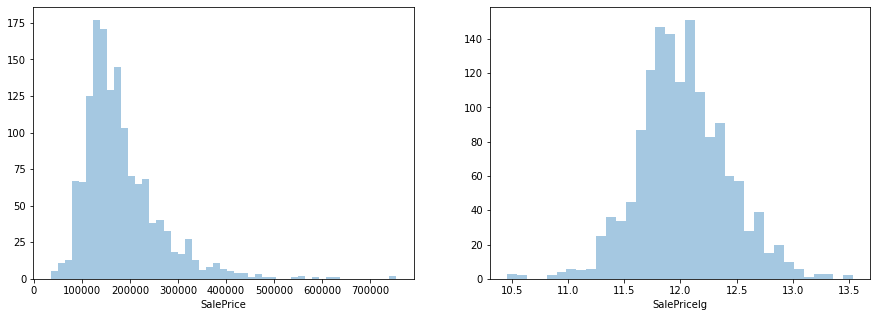

In [115]:
#For SalePrice (dependent variable), I scale using log as requested by the competition. The remaining variables will be scaled using SKlearn

print(data.SalePrice.skew(),data.SalePrice.kurt())
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data["SalePrice"],kde=False)
data["SalePricelg"]=np.log(data.SalePrice)
plt.subplot(1,2,2)
sns.distplot(data["SalePricelg"],kde=False)
print(data.SalePricelg.skew(),data.SalePricelg.kurt())

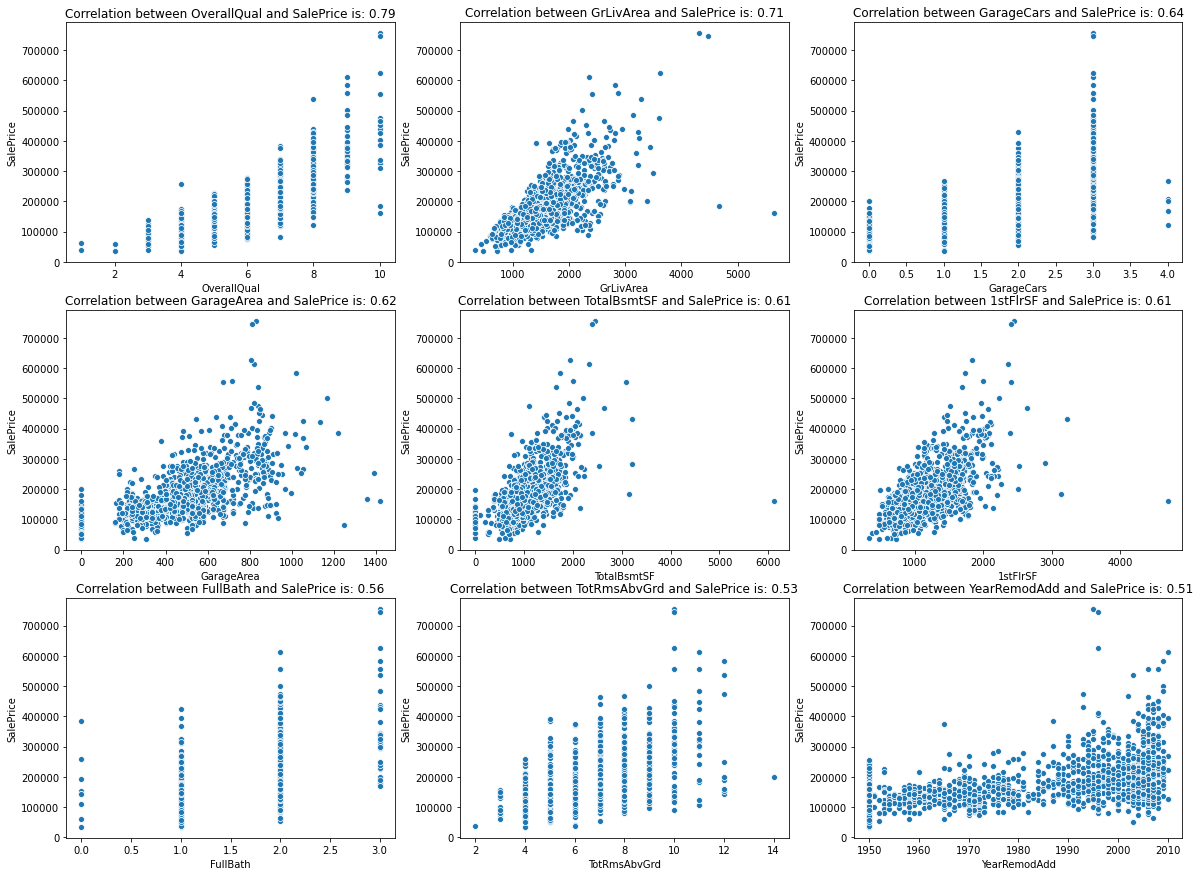

In [116]:
#Visualization to identify outliers
topnine=data.corr()["SalePrice"].sort_values(ascending=False).index[2:11]

plt.figure(figsize=(20,15))

for y,z in zip(range(1,10),topnine):
    plt.subplot(3,3,y)
    sns.scatterplot(x=z,y="SalePrice", data=data,legend="full")
    plt.title("Correlation between " + z + " and SalePrice is: " +  str(data[["SalePrice",z]].corr().SalePrice[z].round(2)))

In [117]:
#Find and eliminate the 2 outliers
data.drop(data[(data["GrLivArea"]>4000) & (data["SalePrice"]<300000)].index,axis=0,inplace=True)

In [118]:
#Some numerical data has little variance, with most values being 0. I try and identify and drop useless ones (so many features still!)
zero_percent={}
for x in data.select_dtypes(include=numerics).drop(columns=["SalePrice"]).columns:
    zero_values=sum(data[x]==0)/len(data[x])*100
    zero_percent[x]=zero_values

zero_percent=pd.DataFrame(zero_percent.values(),zero_percent.keys(), columns=["% of 0"])
zero_percent

,% of 0
LotFrontage,16.660953
LotArea,0.000000
OverallQual,0.000000
OverallCond,0.000000
YearRemodAdd,0.000000
MasVnrArea,60.370243
BsmtFinSF1,31.882071
BsmtFinSF2,88.104217
BsmtUnfSF,8.296195
TotalBsmtSF,2.708262


In [119]:
#drop numerical features with 90% data at 0
data.drop(zero_percent[zero_percent["% of 0"]>=70].index,axis=1,inplace=True)

In [120]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [121]:
#Clearly, Houses with fireplaces are very different from those without.
#However, regression results are worse when I split into 2 datasets. So I leave them together
data_no_FP=data[data["FireplaceQu"]=="None"]
data_w_FP=data[data["FireplaceQu"]!="None"]
data_no_FP_corr=data_no_FP.corr()["SalePricelg"].sort_values(ascending=False).index[2:11]
data_w_FP_corr=data_w_FP.corr()["SalePricelg"].sort_values(ascending=False).index[2:11]
data_corr=data.corr()["SalePricelg"].sort_values(ascending=False).index[2:11]
#pd.DataFrame({"All data": data_corr,"With Fireplace": data_w_FP_corr,"No Fireplace": data_no_FP_corr})
#data=data_w_FP

In [122]:
#Label encoding feature variables. This is an attempt to minimize number of features (too many!)
#categorical= data.select_dtypes(exclude=numerics).columns
#for c in categorical:
#    lbl=LabelEncoder()
#    lbl.fit(list(data[c].values))
#    data[c]=lbl.transform(list(data[c].values))
    
#This splits some OHE and some pd.get_dummies. While this leads to >200 features, PCA/Kbest results are slightly improved.       
ordinal=["MSSubClass","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","FireplaceQu","GarageFinish","GarageQual","GarageCond"]
for c in ordinal:
    lbl=LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c]=lbl.transform(list(data[c].values))
data=pd.get_dummies(data,drop_first=True)  

##get_dummies for all
#data=pd.get_dummies(data,drop_first=True)

In [123]:
ntrain = data.notnull().sum()["SalePricelg"]

target= data["SalePricelg"][:ntrain]
train=data[:ntrain].drop(["SalePrice","SalePricelg"],axis=1)
predict=data[ntrain:].drop(["SalePrice","SalePricelg"],axis=1)

## Section 4: Feature Engineering

* Feature Reduction
* PCA plot in 2D

In [124]:
#Obtaining my train/test datasets

scaler=RobustScaler()
pca=PCA()


X_train,X_test,Y_train,Y_test=train_test_split(train,target)

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
predict_scaled=scaler.transform(predict)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1093, 208), (365, 208), (1093,), (365,))

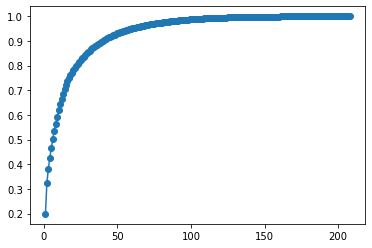

In [125]:
pca.fit(X_train)
components=range(1,len(pca.explained_variance_ratio_)+1)

plt.plot(components,pca.explained_variance_ratio_.cumsum(),marker="o")

#pd.DataFrame(pca.explained_variance_ratio_.round(2),index=train.columns)

In [126]:
# 1-D visualization with PCA. I skip this step as this focus is on ML training
#pca=PCA(n_components=1)
#X_train_pca=pca.fit_transform(X_train)
#X_test_pca=pca.transform(X_test)
#plt.scatter(X_train_pca,Y_train)

In [127]:
# 2-D visualization with PCA. I skip this step as this focus is on ML training
#from mpl_toolkits.mplot3d import Axes3D # enables you to plot 3-D

#pca=PCA(n_components=2)
#X_train_pca2=pca.fit_transform(X_train)
#X_test_pca2=pca.transform(X_test)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], Y_train)

In [128]:
#One more with Kbest
from sklearn.feature_selection import f_regression
kbest = SelectKBest(k="all", score_func=f_regression)

kbest.fit(X_train,Y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x0000024479534558>)

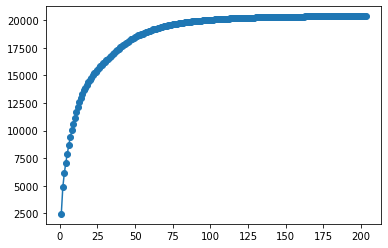

In [129]:
# Nice kink here 
components=range(1,len(kbest.scores_)+1)

kbest_dataframe= pd.DataFrame(kbest.scores_,index=train.columns).sort_values(by=0,ascending=False)

plt.plot(components,kbest_dataframe[0].values.cumsum(),marker="o")

kbest=SelectKBest(k=20,score_func=f_regression)
X_train_kbest=kbest.fit_transform(X_train,Y_train)
X_test_kbest=kbest.transform(X_test)

In [130]:
#Identify the optimal components for PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet,Ridge, SGDRegressor,LassoCV
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb

pca_dict={}
for x in range(1,75):
    pca=PCA(n_components=x)
    regressor=LinearRegression()
    X_train_pca_max=pca.fit_transform(X_train)
    regressor.fit(X_train_pca_max,Y_train)
    training_score=cross_val_score(regressor,X_train_pca_max,Y_train)
    pca_dict[x]=training_score.mean()
pd.DataFrame(pca_dict.items()).set_index(0).sort_values(by=1,ascending=False)[:3]

,1
0,
66,0.907967
69,0.907925
72,0.907696


In [131]:
#Identify the optimal variables for Kbest. I identify 29 features
kbest_dict={}
for x in range(1,75):
    kbest=SelectKBest(k=x,score_func=f_regression)
    regressor=LinearRegression()
    X_train_kbest_max=kbest.fit_transform(X_train,Y_train)
    regressor.fit(X_train_kbest_max,Y_train)
    training_score=cross_val_score(regressor,X_train_kbest_max,Y_train)
    kbest_dict[x]=training_score.mean()
pd.DataFrame(kbest_dict.items()).set_index(0).sort_values(by=1,ascending=False)[:3]

,1
0,
49,0.894245
48,0.893356
41,0.891357


## Section 5: Model Engineering


In [132]:
pca=PCA(n_components=75)
kbest = SelectKBest(k=70, score_func=f_regression)
X_train_final=pca.fit_transform(X_train)
X_test_final=pca.transform(X_test)

predict_scaled_final=pca.transform(predict_scaled)
#X_train_final=kbest.fit_transform(X_train,Y_train)
#X_test_final= kbest.transform(X_test)

In [133]:
xgb_model=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

print( "XGB score is: " + str(round(cross_val_score(xgb_model,X_train_final,Y_train).mean(),4)))
xgb_model.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(xgb_model.predict(X_train_final),Y_train))
print( "XGB train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(xgb_model.predict(X_test_final),Y_test))
print( "XGB test RMSE is: " + str(round(rmse,4)))

[10:11:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:11:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:11:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [134]:
#Base model accuracy

knn=KNeighborsRegressor()
print( "K Neighbors score is: " + str(round(cross_val_score(knn,X_train_final,Y_train).mean(),4)))
knn.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(knn.predict(X_train_final),Y_train))
print( "K Neighbors train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(knn.predict(X_test_final),Y_test))
print( "K Neighbors test RMSE is: " + str(round(rmse,4)))

dtr=DecisionTreeRegressor()
#dtr.fit(X_train_pca_max,Y_train)
print( "DTR score is: " + str(round(cross_val_score(dtr,X_train_final,Y_train).mean(),4)))
dtr.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(dtr.predict(X_train_final),Y_train))
print( "DTR train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(dtr.predict(X_test_final),Y_test))
print( "DTR test RMSE is: " + str(round(rmse,4)))


lr=LinearRegression()
print( "Linear Regressor score is: " + str(round(cross_val_score(lr,X_train_final,Y_train).mean(),4)))
lr.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(lr.predict(X_train_final),Y_train))
print( "LR train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(lr.predict(X_test_final),Y_test))
print( "LR test RMSE is: " + str(round(rmse,4)))

enet= ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
print( "ElasticNet score is: " + str(round(cross_val_score(enet,X_train_final,Y_train).mean(),4)))
enet.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(enet.predict(X_train_final),Y_train))
print( "ENet train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(enet.predict(X_test_final),Y_test))
print( "ENet test RMSE is: " + str(round(rmse,4)))


alphas = np.logspace(-4, -0.5, 30)
lasso= LassoCV(alphas=alphas,cv=5, random_state=0)
print( "Lasso score is: " + str(round(cross_val_score(lasso,X_train_final,Y_train).mean(),4)))
lasso.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(lasso.predict(X_train_final),Y_train))
print( "Lasso train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(enet.predict(X_test_final),Y_test))
print( "Lasso test RMSE is: " + str(round(rmse,4)))

ridge= Ridge()
print( "Ridge score is: " + str(round(cross_val_score(ridge,X_train_final,Y_train).mean(),4)))
ridge.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(ridge.predict(X_train_final),Y_train))
print( "Ridge train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(ridge.predict(X_test_final),Y_test))
print( "Ridge test RMSE is: " + str(round(rmse,4)))

sgd= SGDRegressor()
print( "SGD score is: " + str(round(cross_val_score(sgd,X_train_final,Y_train).mean(),4)))
sgd.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(sgd.predict(X_train_final),Y_train))
print( "SGD train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(sgd.predict(X_test_final),Y_test))
print( "SGD test RMSE is: " + str(round(rmse,4)))

K Neighbors score is: 0.8223
K Neighbors train RMSE is: 0.1373
K Neighbors test RMSE is: 0.1681
DTR score is: 0.6604
DTR train RMSE is: 0.0
DTR test RMSE is: 0.2164
Linear Regressor score is: 0.9078
LR train RMSE is: 0.1114
LR test RMSE is: 0.118
ElasticNet score is: 0.909
ENet train RMSE is: 0.1119
ENet test RMSE is: 0.1181
Lasso score is: 0.9091
Lasso train RMSE is: 0.1121
Lasso test RMSE is: 0.1181
Ridge score is: 0.908
Ridge train RMSE is: 0.1114
Ridge test RMSE is: 0.118
SGD score is: 0.8772
SGD train RMSE is: 0.129
SGD test RMSE is: 0.1319


In [135]:
#Tune Elasticnet, KNN,Ridge and SGD
from sklearn.model_selection import GridSearchCV

parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

enet2=GridSearchCV(ElasticNet(),parametersGrid,cv=3)
enet2.fit(X_train_final,Y_train)

print("ElasticNet best parameters are: " , enet2.best_params_)

#KNN gives a lousy score
#parametersGrid = {"leaf_size": list(range(1,20,4)),
#                      "n_neighbors": list(range(1,20,4)),
#                      "p": [1,2]}
#
#knn2=GridSearchCV(KNeighborsRegressor(),parametersGrid,cv=3,)
#knn2.fit(X_train_final,Y_train)
#
#print("K Nears Neightbours best parameters are: " , knn2.best_params_)

parametersGrid = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge2=GridSearchCV(Ridge(),parametersGrid,cv=3)
ridge2.fit(X_train_final,Y_train)

print("Ridge best parameters are: " , ridge2.best_params_)


parametersGrid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],}

sgd2=GridSearchCV(SGDRegressor(),parametersGrid,cv=3)
sgd2.fit(X_train_final,Y_train)
print("SGD best parameters are: " , sgd2.best_params_)

ElasticNet best parameters are:  {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 10}
Ridge best parameters are:  {'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}
SGD best parameters are:  {'alpha': 0.0001, 'learning_rate': 'constant', 'loss': 'huber', 'penalty': 'l2'}


In [136]:
enet=ElasticNet(alpha=0.01,l1_ratio=0.4,max_iter=10)
print( "ElasticNet score is: " + str(round(cross_val_score(enet2,X_train_final,Y_train).mean(),4)))
enet.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(enet.predict(X_train_final),Y_train))
print( "ENet train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(enet.predict(X_test_final),Y_test))
print( "ENet test RMSE is: " + str(round(rmse,4)))

#KNN gives a lousy score
#knn=KNeighborsRegressor(leaf_size=1,n_neighbors=9,p=2)
#print( "K means score is: " + str(round(cross_val_score(knn,X_train_final,Y_train).mean(),4)))
#knn.fit(X_train_final,Y_train)
#rmse=np.sqrt(mean_squared_error(knn.predict(X_train_final),Y_train))
#print( "K means train RMSE is: " + str(round(rmse,4)))
#rmse=np.sqrt(mean_squared_error(knn.predict(X_test_final),Y_test))
#print( "K means test RMSE is: " + str(round(rmse,4)))

ridge=Ridge(alpha=1,fit_intercept=True,solver='saga')
print( "Ridge score is: " + str(round(cross_val_score(ridge,X_train_final,Y_train).mean(),4)))
ridge.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(ridge.predict(X_train_final),Y_train))
print( "Ridge train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(ridge.predict(X_test_final),Y_test))
print( "Ridge test RMSE is: " + str(round(rmse,4)))

sgd=SGDRegressor(alpha=1e-05,learning_rate='invscaling',penalty='l2')

print( "SGD score is: " + str(round(cross_val_score(sgd,X_train_final,Y_train).mean(),4)))
sgd.fit(X_train_final,Y_train)
rmse=np.sqrt(mean_squared_error(sgd.predict(X_train_final),Y_train))
print( "SGD train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(sgd.predict(X_test_final),Y_test))
print( "SGD test RMSE is: " + str(round(rmse,4)))



ElasticNet score is: 0.9092
ENet train RMSE is: 0.1256
ENet test RMSE is: 0.1269
Ridge score is: 0.9088
Ridge train RMSE is: 0.1115
Ridge test RMSE is: 0.1181
SGD score is: 0.8838
SGD train RMSE is: 0.1249
SGD test RMSE is: 0.126


In [137]:
from sklearn.ensemble import StackingRegressor

estimator=[("Lasso",lasso),("ElasticNet",enet),("Ridge",ridge),("Linear",lr),("SGD",sgd)]

reg=StackingRegressor(estimators=estimator,cv=5)

reg.fit(X_train_final,Y_train).score(X_train_final,Y_train)

print( "Stacker score is: " + str(round(cross_val_score(reg,X_train_final,Y_train).mean(),4)))
rmse=np.sqrt(mean_squared_error(reg.predict(X_train_final),Y_train))
print( "Stacker train RMSE is: " + str(round(rmse,4)))
rmse=np.sqrt(mean_squared_error(reg.predict(X_test_final),Y_test))
print( "Stacker test RMSE is: " + str(round(rmse,4)))

Stacker score is: 0.9091
Stacker train RMSE is: 0.1123
Stacker test RMSE is: 0.1179


In [138]:
#I take the average of 4 models predictions. Still not an improved score

Y_combined=(lr.predict(X_test_final)+ enet.predict(X_test_final) +
            lasso.predict(X_test_final)+ridge.predict(X_test_final)
            )/4

rmse=np.sqrt(mean_squared_error(Y_combined,Y_test))
print( "Averaged test RMSE is: " + str(round(rmse,5)))

Averaged test RMSE is: 0.11826


[10:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:12:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:12:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

[10:13:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:13:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:13:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

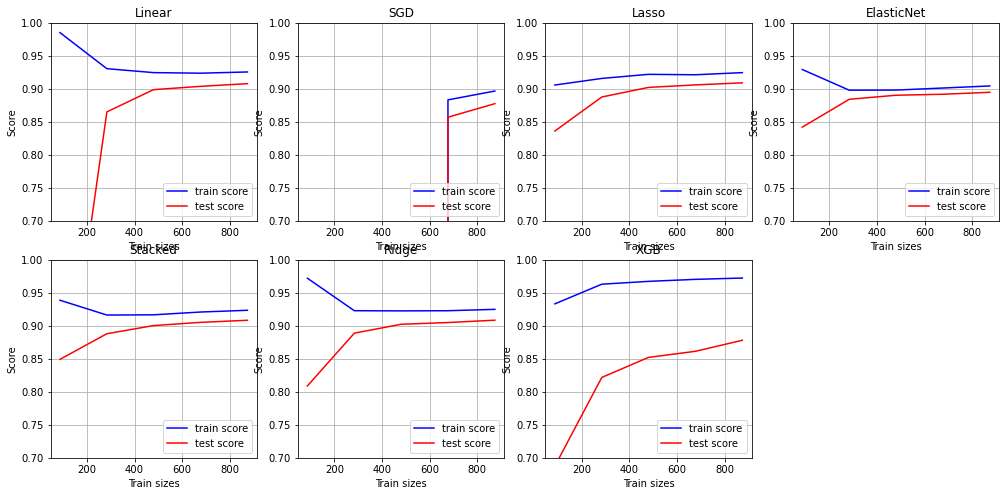

In [139]:
from sklearn.model_selection import learning_curve

models={"Linear": lr,"SGD": sgd,"Lasso": lasso,"ElasticNet":
        enet,"Stacked":reg,"Ridge": ridge,"XGB":xgb_model}
x=1
plt.figure(figsize=(17,8))
for key, model in models.items():
    train_sizes, train_scores, test_scores=learning_curve(model,X_train_final,Y_train)
    plt.subplot(2,4,x)
    plt.plot(train_sizes,train_scores.mean(axis=1),color="b",label="train score")
    plt.plot(train_sizes,test_scores.mean(axis=1),color="r",label="test score")
    plt.xlabel("Train sizes"),plt.ylabel("Score"),plt.grid(True),plt.legend(loc="lower right"),plt.ylim((0.7,1)),plt.title(key)
    x=x+1


## Section 6: Evaluate Metrics

The competition requested us to use RMSE. This penalizes the predicted house prices equally, regardless of how cheap/expensive the actual price is.

In [140]:
#averaged_result=(lr.predict(predict_scaled_final)+ enet.predict(predict_scaled_final) +
#            lasso.predict(predict_scaled_final)+ridge.predict(predict_scaled_final)
#            )/4

In [141]:
final_result=pd.DataFrame({"Id": data[ntrain:].index,"SalePrice": reg.predict(predict_scaled_final)})
#final_result=pd.DataFrame({"Id": data[ntrain:].index,"SalePrice": averaged_result})

In [142]:
final_result["SalePrice"]=np.exp(final_result["SalePrice"])
final_result["Id"]=final_result["Id"]+1

In [143]:
final_result.to_csv('submission.csv',index=False,header=True)

## Section 7: Observations and analysis

Linear regression was generally a decent model.. additional work via new complex models and stacking,averaging etc. did not lead to great improvement. I would try tweaks to the original data processing to improve the overall score.

Overall I'm happy with the score (~13-14% RMSE ). However I'm still very curious how these guys on Kaggle obtained significantly better results, especially since the data processing step seems relatively similar. 